In [1]:
path_to_muograph = "../"
import sys
sys.path.insert(1, path_to_muograph)

%reload_ext autoreload
%autoreload 2

# Python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, sqrt, square, arange  # for RMS calculation
import os
import math
import sys
import os
import torch

# Set figure size
plt.rcParams["figure.figsize"] = (8, 8)  #set default figure size

# Data file (rootfile)

In [3]:
folder = "/home/aitor/Software/CoDesign/simulation/mst/build/"
# root_file = "../muograph/data/Al_Pb_Fe_Cu_cubes/cubesAlFePbCu.root"
root_file = folder + "output_file_name_60.root"
root_file = folder + "output_file_name.root"

print(root_file)

import uproot

with uproot.open(root_file) as f:
    tree = f[list(f.keys())[0]]
    arrays = {branch: tree[branch].array() for branch in tree.keys()}

f"Root file branches are {list(arrays.keys())}"

/home/aitor/Software/CoDesign/simulation/mst/build/output_file_name.root


"Root file branches are ['eventID', 'x', 'y', 'z', 'px', 'py', 'pz', 'kineticEnergy', 'plane']"

In [20]:
arrays['x']

<Array [130, 120, 110, -110, ..., -109, 110, 120, 131] type='90 * float64'>

In [5]:
arrays['plane']

<Array [5, 4, 3, 2, 1, 0, 0, 1, ..., 1, 0, 0, 1, 2, 3, 4, 5] type='90 * int32'>

In [28]:
measures = np.array(arrays['x'])
planes   = np.array(arrays['plane'])

def normalize_muon(measures, planes):
    planes = np.array(planes)
    measures = np.array(measures)

    # Caso 1: orden ascendente → lo dejamos igual
    if np.all(planes == np.arange(len(planes))):
        return measures, planes

    # Caso 2: orden descendente → invertimos arrays
    if np.all(planes == np.arange(len(planes))[::-1]):
        return measures[::-1], planes[::-1]

    # Si no es ninguna de las dos, hay un problema en los datos
    raise ValueError(f"Planes no es ni ascendente ni descendente: {planes}")


def normalize_all(measures, planes, nplanes=6):
    measures = np.array(measures)
    planes   = np.array(planes)

    N = len(measures)
    assert N % nplanes == 0

    out_meas = []
    out_planes = []

    for i in range(0, N, nplanes):
        m = measures[i:i+nplanes]
        p = planes[i:i+nplanes]
        m_norm, p_norm = normalize_muon(m, p)
        out_meas.append(m_norm)
        out_planes.append(p_norm)

    return np.vstack(out_meas), np.vstack(out_planes)

h = normalize_all(measures, planes)

h
# print(planes_sorted)
# print(measures_sorted)

(array([[-130.5       , -120.5       , -110.5       ,  109.5       ,
          119.5       ,  129.63049741],
        [-129.5       , -119.5       , -109.5       ,  110.5       ,
          120.5       ,  130.5       ],
        [-130.5       , -120.5       , -110.5       ,  109.5       ,
          119.5       ,  129.5       ],
        [-129.5       , -119.5       , -109.5       ,  110.5       ,
          120.5       ,  130.5       ],
        [-129.5       , -119.5       , -109.5       ,  110.5       ,
          120.5       ,  130.5       ],
        [-130.5       , -120.5       , -110.5       ,  109.5       ,
          119.5       ,  129.5       ],
        [-130.5       , -120.5       , -110.5       ,  109.5       ,
          119.5       ,  129.5       ],
        [-130.5       , -120.5       , -110.5       ,  109.5       ,
          119.5       ,  129.5       ],
        [-130.5       , -120.5       , -110.5       ,  109.5       ,
          119.5       ,  129.5       ],
        [-129.5    

# Data analysis

In [6]:
# x = np.array(arrays['x'], dtype="float")

# plt.hist(x)

In [8]:
from muograph.hits.hits import Hits

# hits_above = Hits(
#     data = csv_file,  # The csv file
#     plane_labels = (0, 1, 2),  # Include hits from first planes 0, 1 and 2
#     input_unit="mm",  # The distance unit in the csv file.
# )

hits_above = Hits(
    data = root_file,  # The csv file
    plane_labels = (0, 1, 2),  # Include hits from first planes 0, 1 and 2
    input_unit="mm",  # The distance unit in the csv file.
)

hits = Hits(
    data = root_file,  # The file
    plane_labels = (0, 1, 2, 3, 4, 5),  # Include hits from first planes 0, 1 and 2
    input_unit="mm",  # The distance unit in the csv file.
)

# hits_1 = Hits(
#     data = root_file,  # The file
#     plane_labels = (3, 4, 5),  # Include hits from first planes 0, 1 and 2
#     input_unit="mm",  # The distance unit in the csv file.
# )

In [9]:
hits
# hits_1

Collection of hits from 15 muons on 6 detector panels.

In [10]:
hits.gen_hits, hits.gen_hits.shape
# hits_1.gen_hits, hits_1.gen_hits.shape

(tensor([[[-1.3050e+02, -1.3050e+02, -1.3050e+02,  1.3050e+02, -1.3050e+02,
           -1.3050e+02,  1.3050e+02, -1.3050e+02, -1.3050e+02,  1.3050e+02,
           -1.3050e+02,  1.3050e+02,  1.3050e+02,  1.3050e+02, -1.3022e+02],
          [-1.2050e+02, -1.2050e+02, -1.2050e+02,  1.2050e+02, -1.2050e+02,
           -1.2050e+02,  1.2050e+02, -1.2050e+02, -1.2050e+02,  1.2050e+02,
           -1.2050e+02,  1.2050e+02,  1.2050e+02,  1.2050e+02, -1.2050e+02],
          [-1.1050e+02, -1.1023e+02, -1.1050e+02,  1.1050e+02, -1.1050e+02,
           -1.1050e+02,  1.1050e+02, -1.1050e+02, -1.1050e+02,  1.1050e+02,
           -1.1050e+02,  1.1050e+02,  1.1050e+02,  1.1050e+02, -1.1050e+02],
          [ 1.0950e+02,  1.0950e+02,  1.0950e+02, -1.0950e+02,  1.0950e+02,
            1.0950e+02, -1.0950e+02,  1.0950e+02,  1.0950e+02, -1.0950e+02,
            1.0950e+02, -1.0950e+02, -1.0950e+02, -1.0950e+02,  1.0950e+02],
          [ 1.1950e+02,  1.1950e+02,  1.1950e+02, -1.1978e+02,  1.1950e+02,
        

In [11]:
event = 0
# event = hits_0.gen_hits.shape[2]-1
plane_label = 0

(
    f"Muon #{event} hits detector panel {plane_label} "
    f"at x, y, z = {hits.gen_hits[0, plane_label, event]:.1f},"
    f" {hits.gen_hits[1, plane_label, event]:.1f},"
    f" {hits.gen_hits[2, plane_label, event]:.1f} mm "
)

'Muon #0 hits detector panel 0 at x, y, z = -130.5, 214.7, -611.5 mm '

In [12]:
diff = (hits.gen_hits - hits.reco_hits).unique()
diff

tensor([0.])

In [13]:
np.unique(np.array(hits.gen_hits[0, 0, :]))

array([-130.5    , -130.21869,  130.5    ], dtype=float32)

In [18]:
h = np.array(hits.gen_hits[0, 0, :])
h.shape

(15,)

Plane 0


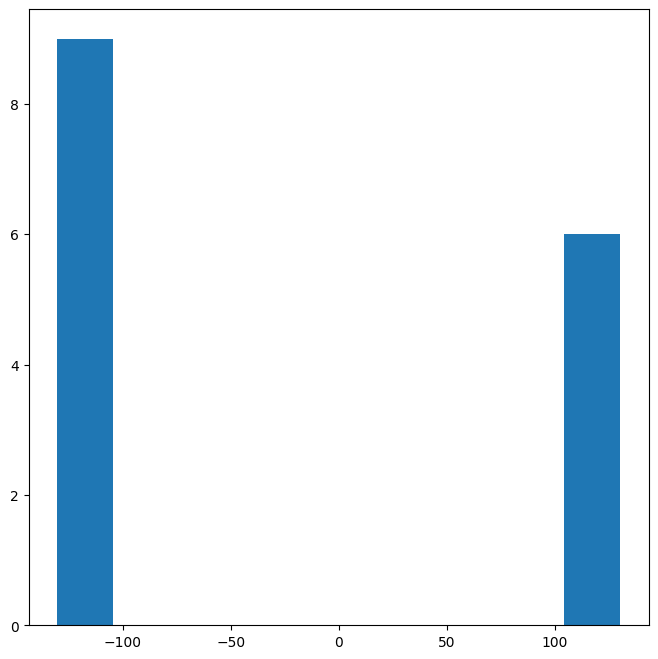

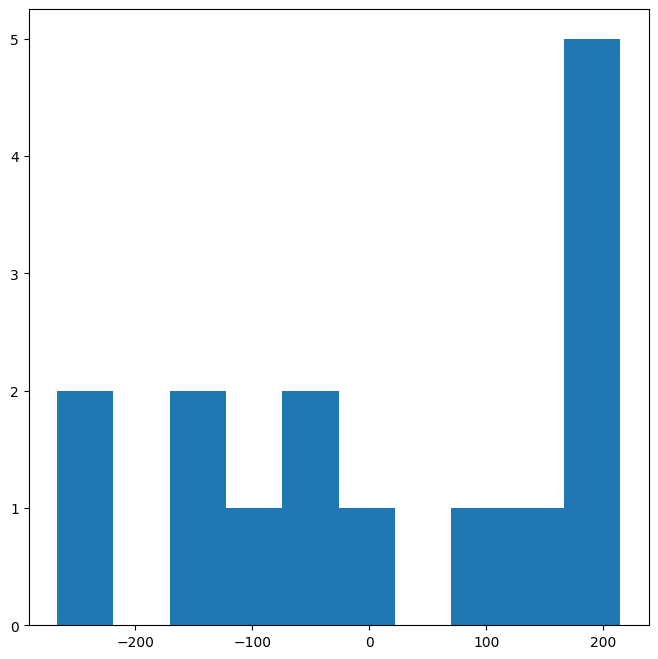

Plane 1


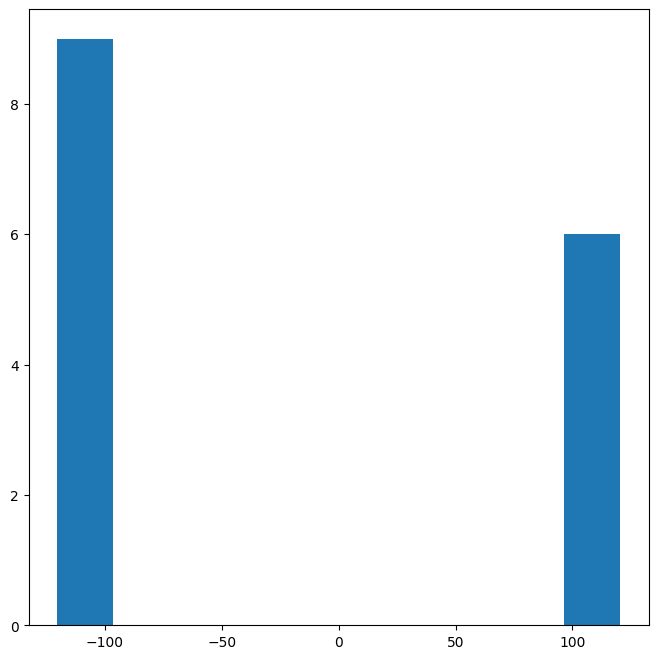

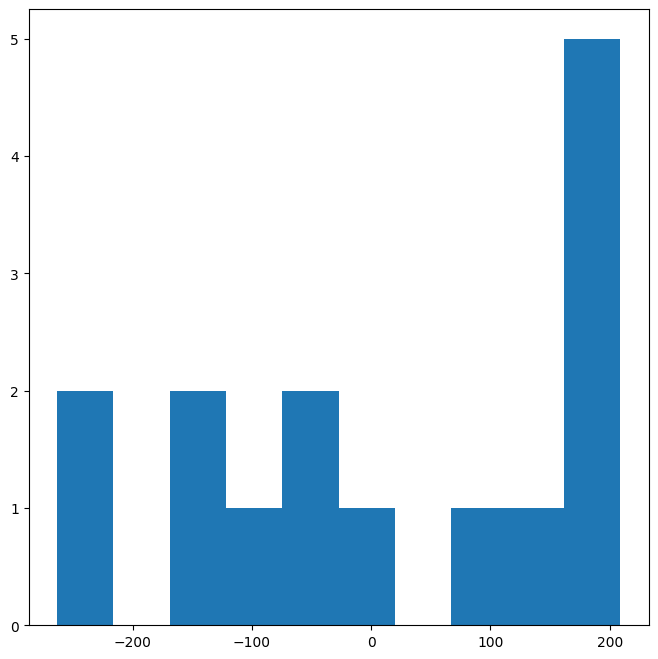

Plane 2


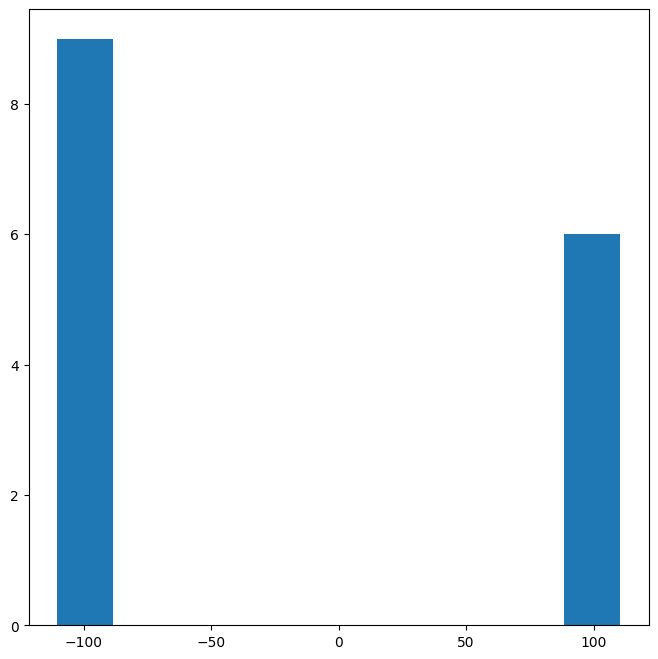

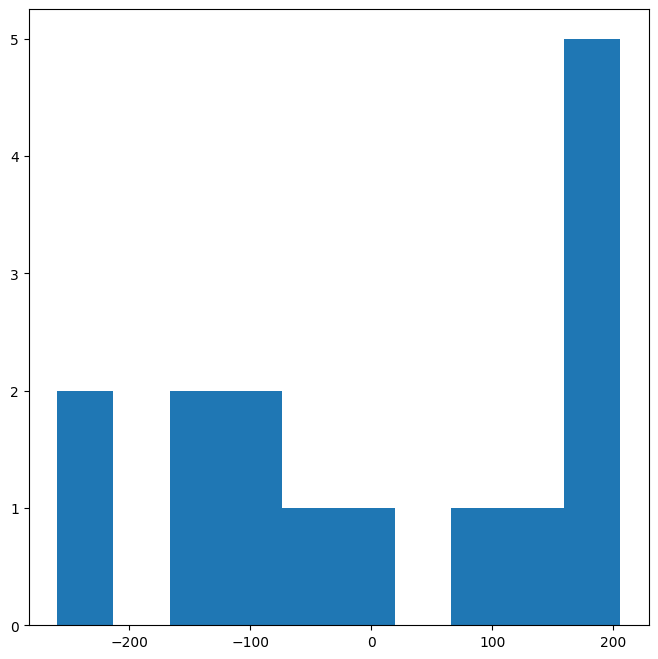

Plane 3


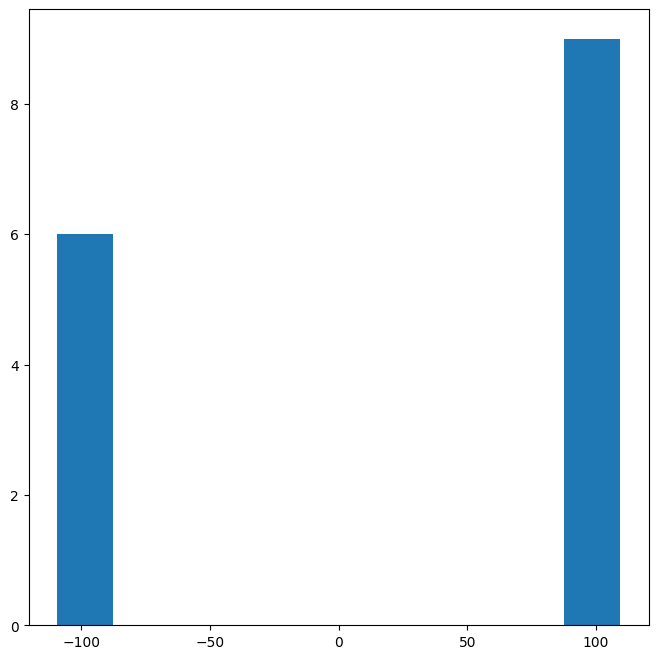

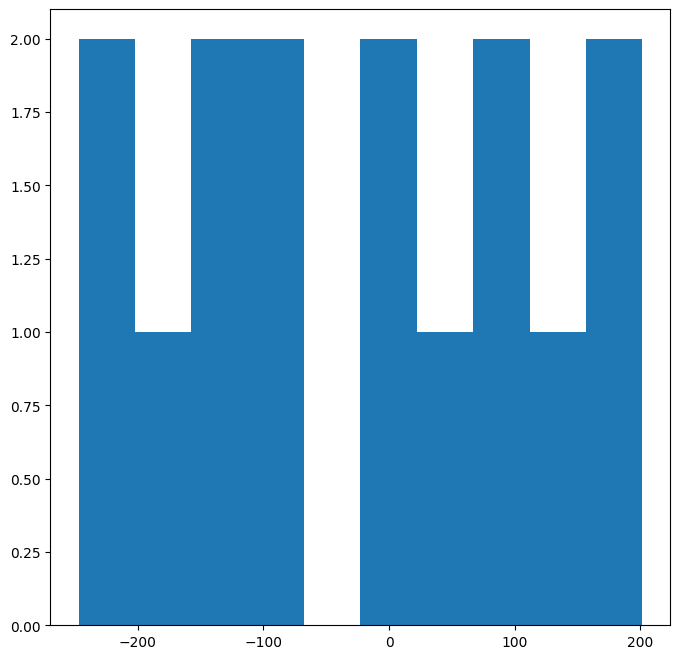

Plane 4


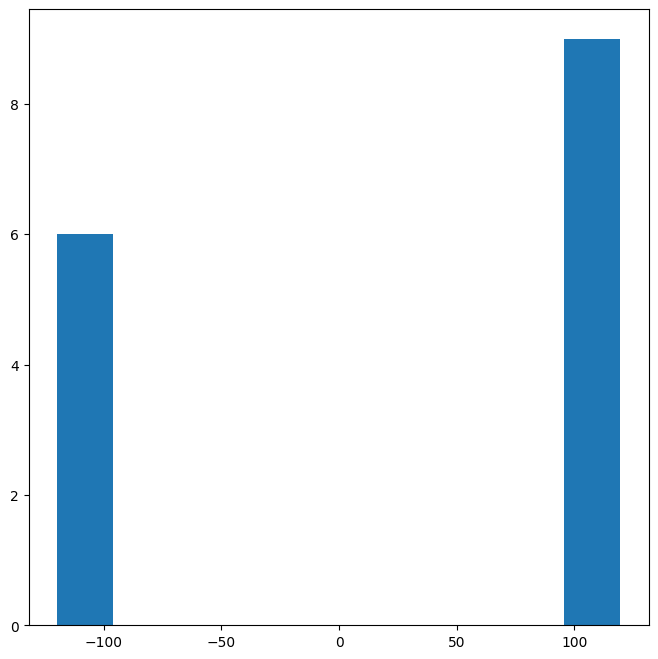

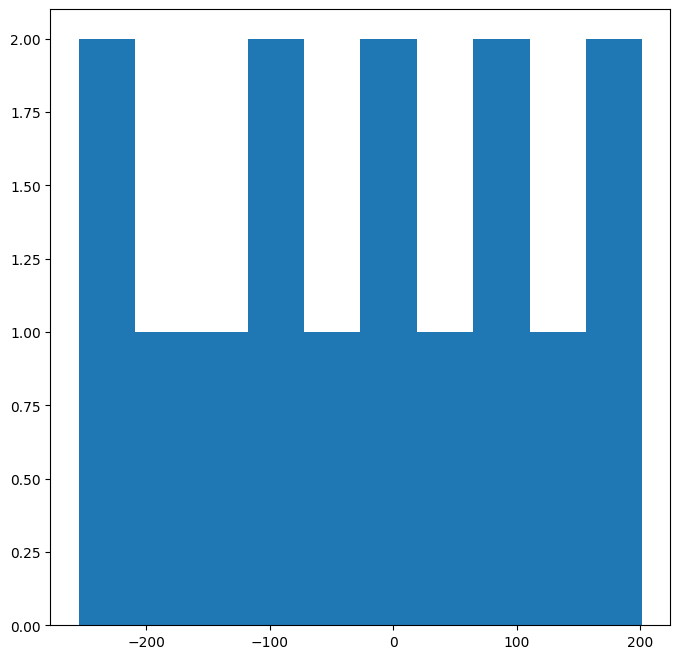

Plane 5


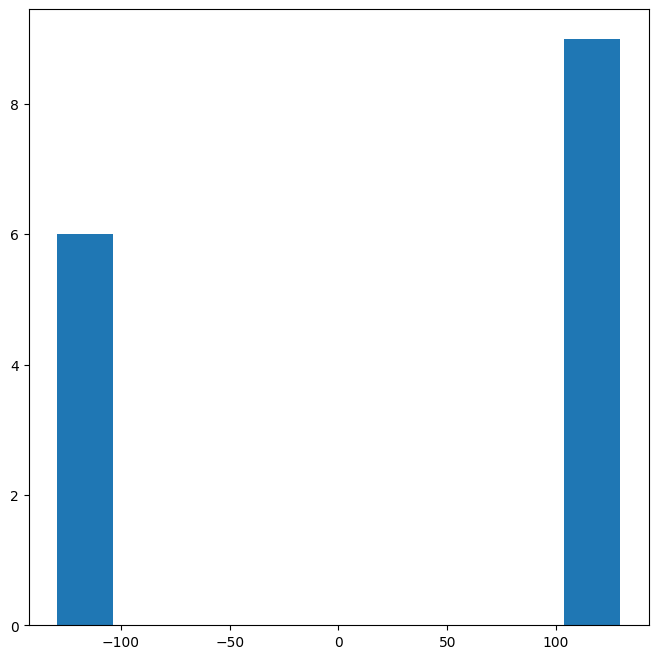

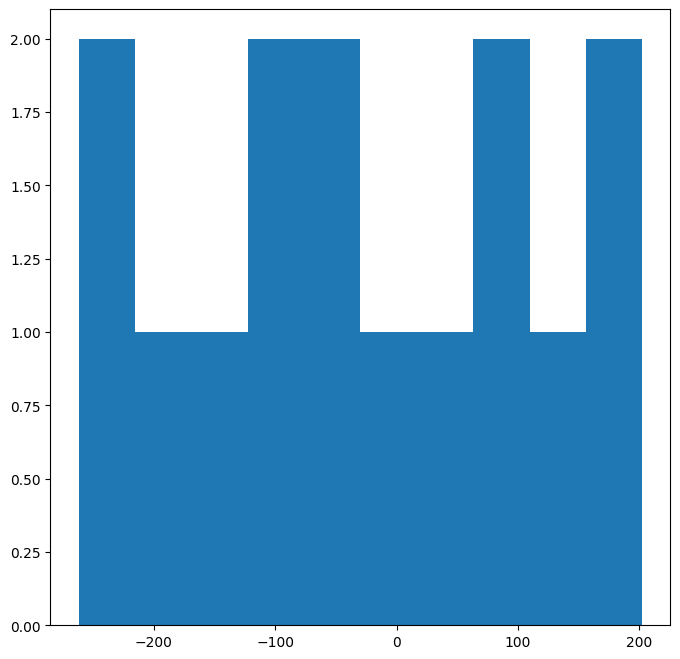

In [14]:
Coordinate = 2
Plane = 0
for Plane in range(0, 6):

    print("Plane " + str(Plane))

    for Coordinate in range(0, 2):
    
        plt.hist(np.array(hits.gen_hits[Coordinate, Plane, :]))
        # plt.hist(np.array(hits_above.gen_hits[Coordinate, Plane, :])/10)
        plt.show()

In [ ]:
hits.plot(plane_label = 0)
hits.plot(plane_label = 1)
hits.plot(plane_label = 2)

In [ ]:
hits_1mm = Hits(
    data = root_file,  # The file
    plane_labels = (0, 1, 2, 3, 4, 5),  # Include hits from first planes 0, 1 and 2
    input_unit="mm",  # The distance unit in the csv file.
    spatial_res = (1.0, 1.0, 0.)  # The spatial resolution along x, y and z in mm.
)